## Electrical Energy Output Modelling Project:
This Project is part of the Machine Learning foundations for Managers Course assignments. In this project we will build a model to predict the electrical energy output of a Combined Cycle Power Plant, which uses a combination of gas turbines, steam turbines, and heat recovery steam generators to generate power.  We have a set of 9568 hourly average ambient environmental readings from sensors at the power plant which we will use in our model.

The columns in the data consist of hourly average ambient variables:
- Temperature (T) in the range 1.81°C to 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (PE) 420.26-495.76 MW (Target we are trying to predict)


## Explanatory Data Analysis:

In [30]:
#import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

C:\Users\mw50000150\AppData\Local\Temp\ipykernel_12812\2555742972.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [31]:
#lets load the data into a dataframe
df = pd.read_csv('CCPP_data.csv')

In [32]:
#info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [33]:
#lets datasets statistics
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [34]:
#sample data
df.head(5)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Model Approach
As We have seen the problem here is predict a continuous variable , we are going to approach this problem with a Regression model. And below we are going to see the code that will determine which features to use as well as a sample of the algorithmns to use and why

In [35]:
#get the features and the target PE
X = df[['AT','V','AP','RH']]
y = df['PE']

In [36]:
#lets get the most important features using mutual understanding
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores[::3]  # show a few features with their MI scores

AT    1.167979
RH    0.119991
Name: MI Scores, dtype: float64

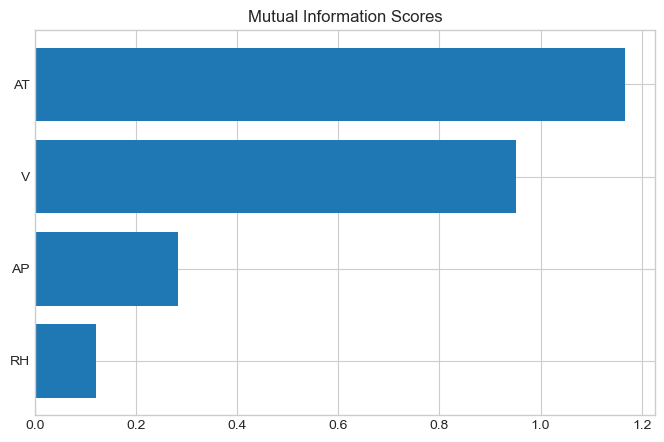

In [37]:
#lets plot the mutual understanding
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

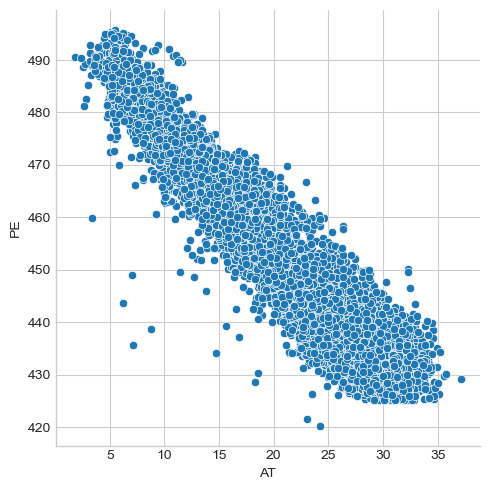

In [16]:
#from the above mutual information scores it looks like the most important 
#features are AT and V so we will try to design a model using those two features
#but before that lets plot the graphs to visualise the relation between the features and the target
sns.relplot(x="AT", y="PE", data=df);

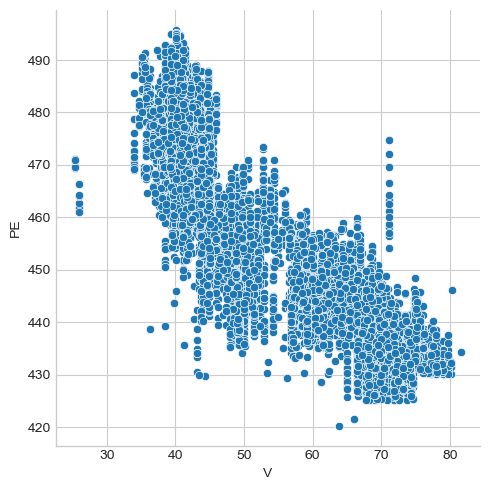

In [17]:
sns.relplot(x="V", y="PE", data=df);

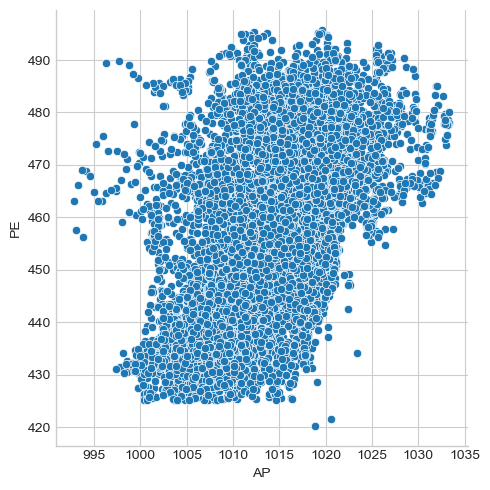

In [18]:
sns.relplot(x="AP", y="PE", data=df);

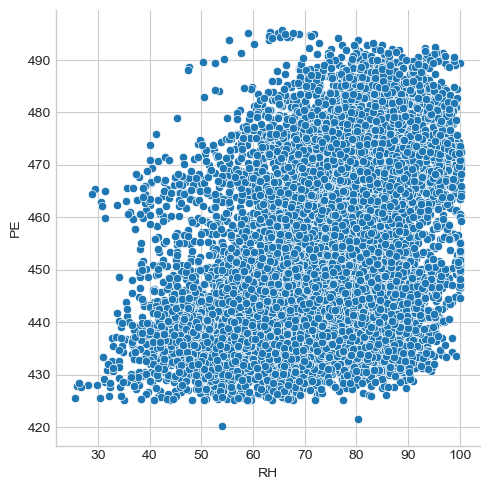

In [19]:
sns.relplot(x="RH", y="PE", data=df);

## Model Building
In this part of the assignment we are going to see which varaible is better suited for our prediction model

In [38]:
 #lets use the two features where we cleary see the relationship
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [45]:
#defining the features and the train to test split at 80% - 20%
features = ['AT','V','AP']
X_train, X_test, y_train, y_test = train_test_split(df[features], df['PE'], test_size=0.2, random_state=42)

In [46]:
# Train and test the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
print("Linear regression mean squared error: ", lr_mse)

# Train and test the random forest regressor model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
rfr_mse = mean_squared_error(y_test, rfr_pred)
print("Random forest regressor mean squared error: ", rfr_mse)

Linear regression mean squared error:  23.35483053657795
Random forest regressor mean squared error:  10.945344054158383


## Model Intepretation

In this project we can see that the Random forest regressor is performing better than the Linear regression model. so the choice of our model will be the Random forest regressor by use the the mean squared error. Thou realy the choice of the model depends on what we really want. Uf the relationship between the input features and the target variable is expected to be linear, and interpretability is a concern, linear regression can be a good choice. However, if the goal is to achieve the highest possible predictive accuracy, or to handle non-linear relationships between features and the target variable, random forest regressors may be a better choice. In this case our goal is the predictive accuracy.